In [62]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

IntraDf = pd.read_csv('/Users/josevans/Library/Mobile Documents/com~apple~CloudDocs/Python files/BTCintraday.csv', index_col='date', parse_dates=True)
DailyDf = pd.read_csv('/Users/josevans/Library/Mobile Documents/com~apple~CloudDocs/Python files/BTCDailyEngineered.csv', index_col='date', parse_dates=True)
IntraDf.head()

,high,open,tradesDone,close,low,volume
date,,,,,,
2020-08-06 00:00:00+00:00,11757.194678,11757.194678,7.0,11732.419353,11732.419353,4.871922
2020-08-06 00:01:00+00:00,11753.930698,11751.933918,3.0,11753.930698,11751.744793,0.000888
2020-08-06 00:02:00+00:00,11785.133323,11766.188451,12.0,11781.654055,11766.188451,0.051744
2020-08-06 00:03:00+00:00,11787.920784,11776.823827,6.0,11784.589509,11776.823827,1.018644
2020-08-06 00:04:00+00:00,11787.542442,11787.542442,5.0,11784.217781,11782.047472,0.014016


In [63]:
IntraDf.shape

(52062, 6)

In [64]:
IntraDf.describe()

,high,open,tradesDone,close,low,volume
count,52062.000000,52062.000000,52062.000000,52062.000000,52062.000000,5.206200e+04
mean,11358.786908,11354.632130,664.698129,11354.609668,11350.211293,5.476842e+01
std,627.884261,628.293493,558.891478,628.286084,628.746747,7.676218e+01
min,9902.283289,9884.326260,1.000000,9890.087324,9853.277604,8.000000e-08
25%,11298.369833,11291.860060,396.000000,11291.993497,11286.652391,2.363361e+01
50%,11602.417729,11599.618704,561.000000,11599.662502,11596.157092,3.818225e+01
75%,11774.006351,11769.883295,797.000000,11769.914679,11765.628299,6.292837e+01
max,12474.778358,12459.539813,18942.000000,12455.933804,12431.762445,3.337754e+03


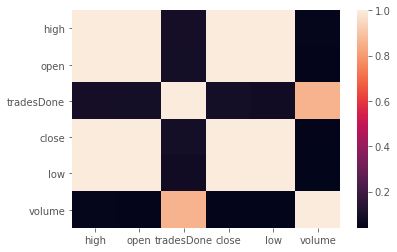

In [65]:
ax = sns.heatmap(IntraDf.corr())

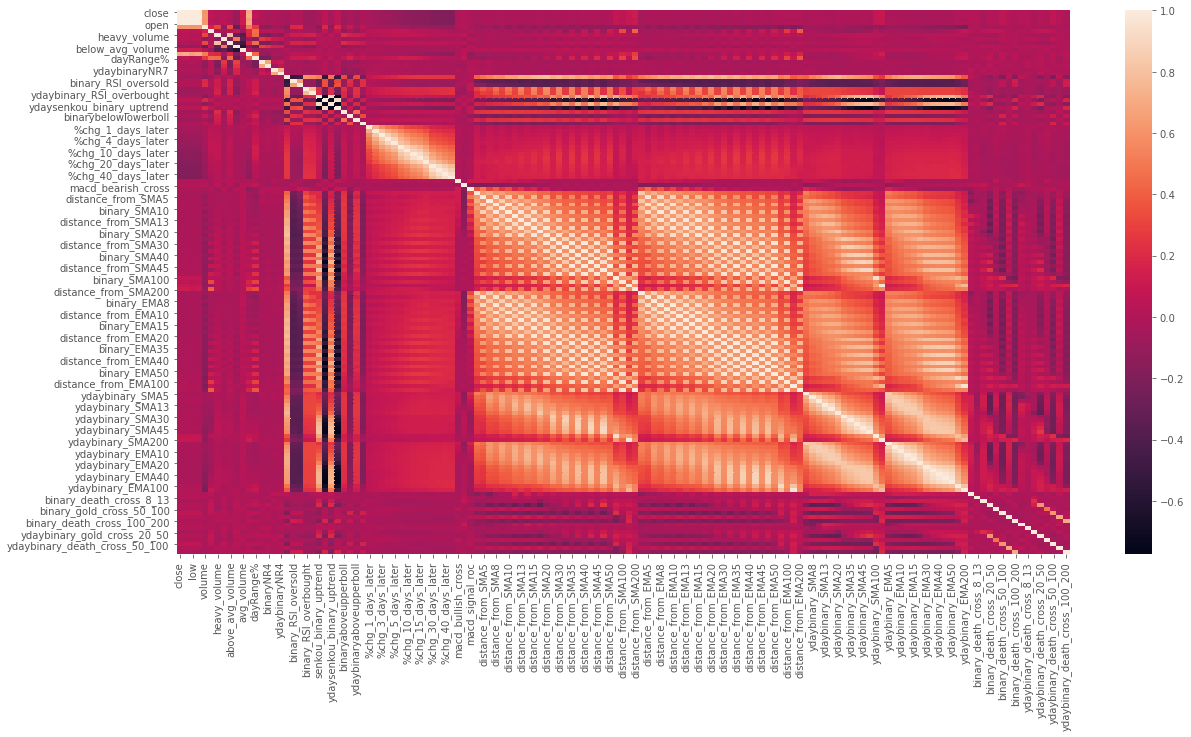

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(DailyDf.corr())
plt.show()

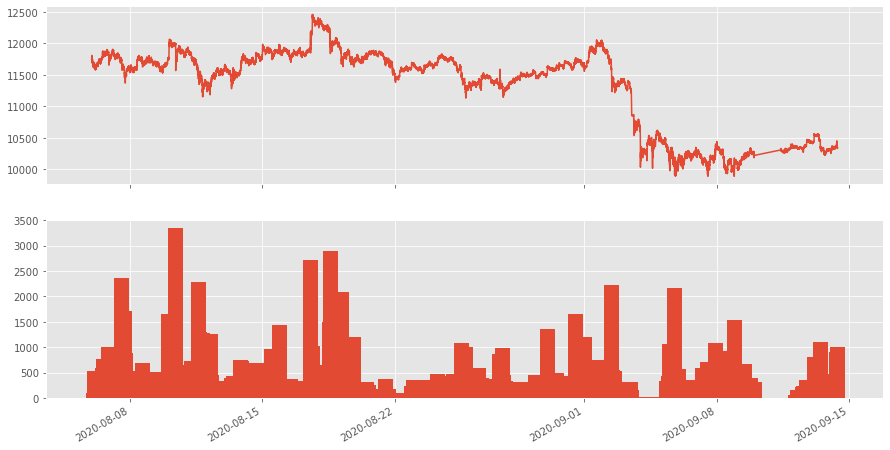

In [15]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(IntraDf.index, IntraDf.close)
ax[1].bar(IntraDf.index, IntraDf.volume)

fig.autofmt_xdate()
plt.show()

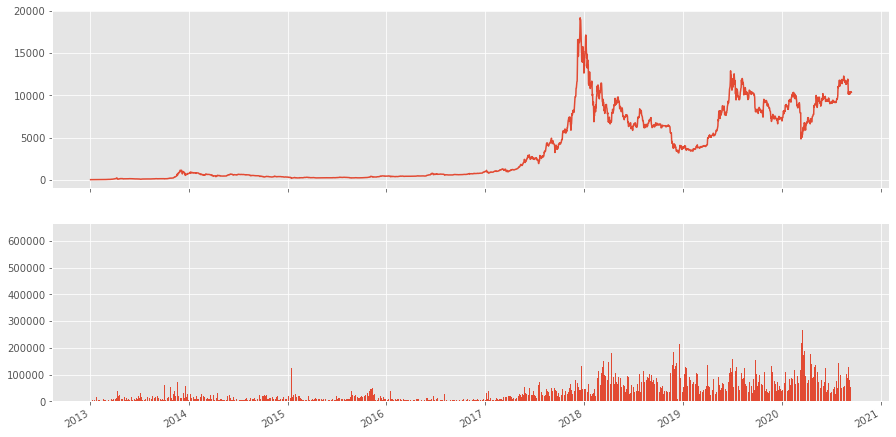

In [16]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(DailyDf.index, DailyDf.close)
ax[1].bar(DailyDf.index, DailyDf.volume)

fig.autofmt_xdate()
plt.show()

In [66]:
DailyDf['dollar_volume'] = DailyDf.volume * DailyDf.close
IntraDf['dollar_volume'] = IntraDf.volume * IntraDf.close

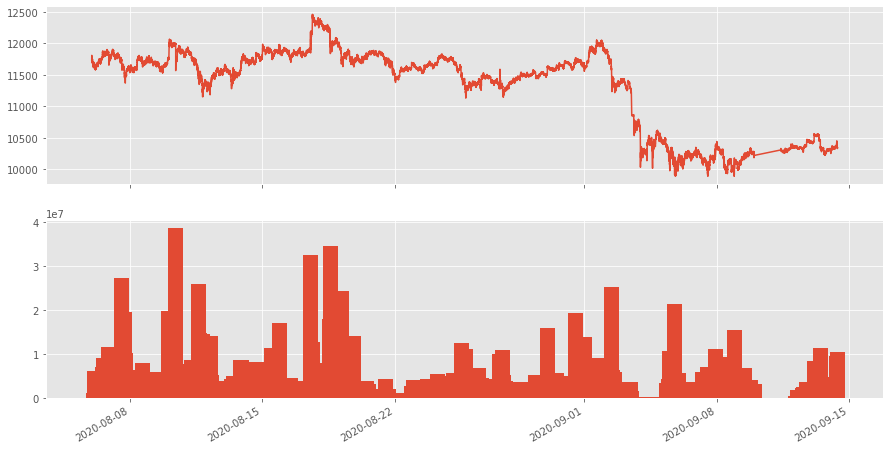

In [20]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(IntraDf.index, IntraDf.close)
ax[1].bar(IntraDf.index, IntraDf.dollar_volume)

fig.autofmt_xdate()
plt.show()

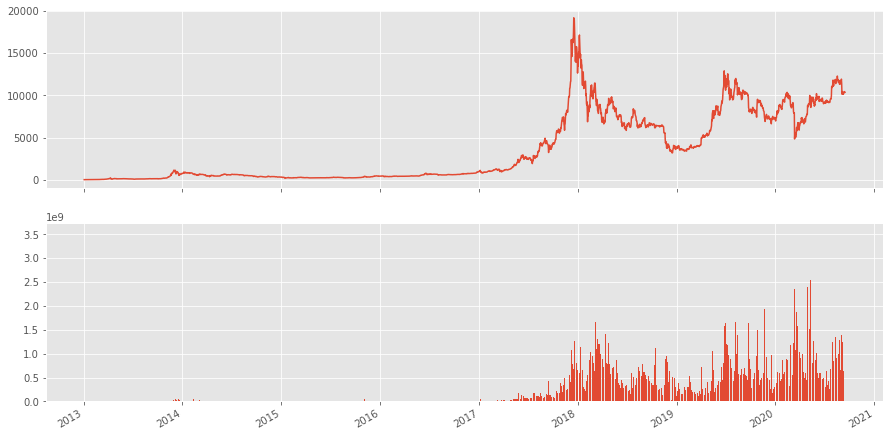

In [21]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(DailyDf.index, DailyDf.close)
ax[1].bar(DailyDf.index, DailyDf.dollar_volume)

fig.autofmt_xdate()
plt.show()

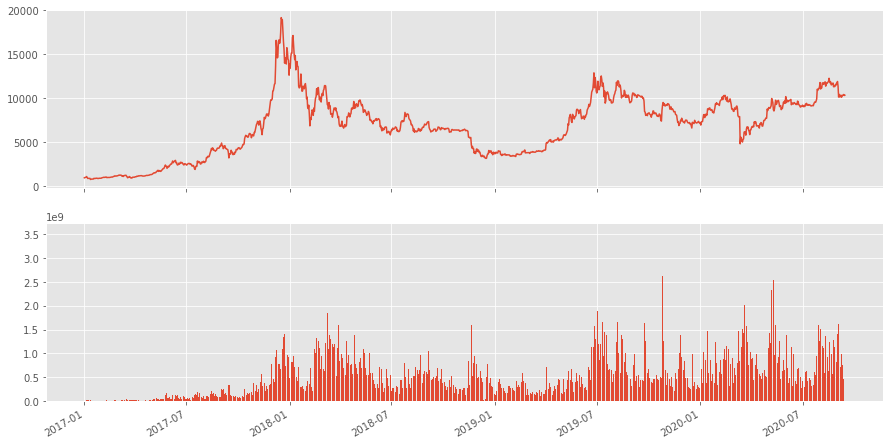

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(DailyDf[DailyDf.index.year >= 2017].index, DailyDf[DailyDf.index.year >= 2017].close)
ax[1].bar(DailyDf[DailyDf.index.year >= 2017].index, DailyDf[DailyDf.index.year >= 2017].dollar_volume)

fig.autofmt_xdate()
plt.show()

In [67]:
IntraDf['pd_1_return'] = IntraDf.close.pct_change() * 100
IntraDf.head()

,high,open,tradesDone,close,low,volume,dollar_volume,pd_1_return
date,,,,,,,,
2020-08-06 00:00:00+00:00,11757.194678,11757.194678,7.0,11732.419353,11732.419353,4.871922,57159.426212,NaN
2020-08-06 00:01:00+00:00,11753.930698,11751.933918,3.0,11753.930698,11751.744793,0.000888,10.433612,0.183350
2020-08-06 00:02:00+00:00,11785.133323,11766.188451,12.0,11781.654055,11766.188451,0.051744,609.629554,0.235865
2020-08-06 00:03:00+00:00,11787.920784,11776.823827,6.0,11784.589509,11776.823827,1.018644,12004.296800,0.024915
2020-08-06 00:04:00+00:00,11787.542442,11787.542442,5.0,11784.217781,11782.047472,0.014016,165.161822,-0.003154


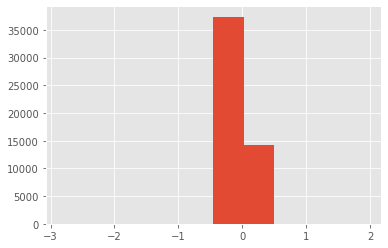

In [32]:
IntraDf.pd_1_return.hist()
plt.show()

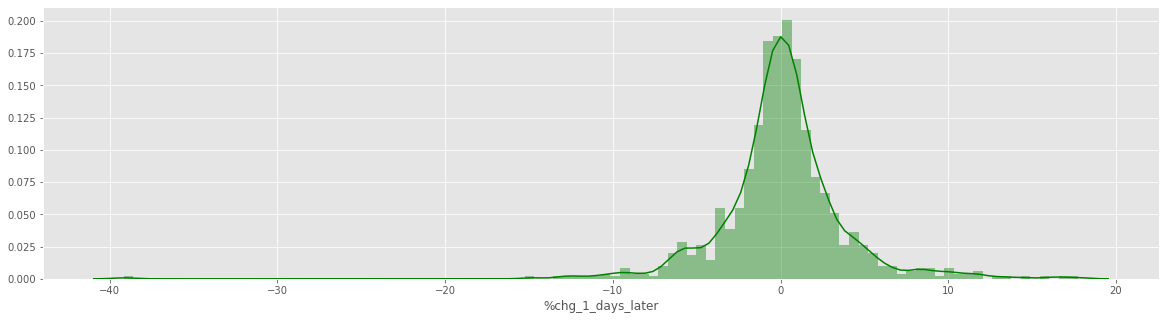

In [40]:
plt.figure(figsize=(20,5))
sns.distplot(DailyDf.loc['2018-05-01':]['%chg_1_days_later'],color='green',bins=100)
plt.show()

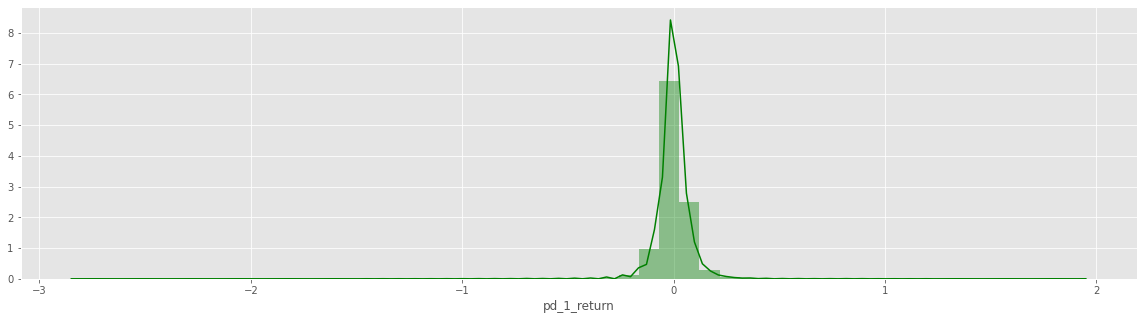

In [44]:
plt.figure(figsize=(20,5))
sns.distplot(IntraDf['pd_1_return'],color='green',bins=50)
plt.show()

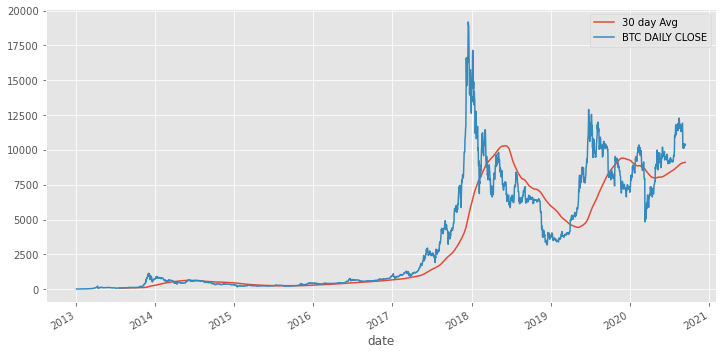

In [52]:
plt.figure(figsize=(12,6))
DailyDf['close'].rolling(window=200).mean().plot(label='30 day Avg')
DailyDf['close'].plot(label='BTC DAILY CLOSE')
plt.legend()
plt.show()

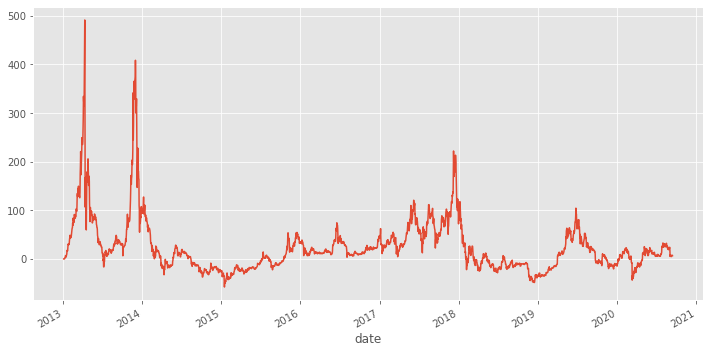

In [54]:
plt.figure(figsize=(12,6))
DailyDf.distance_from_EMA200.plot(label='Distance from EMA200')
plt.show()

/Users/josevans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


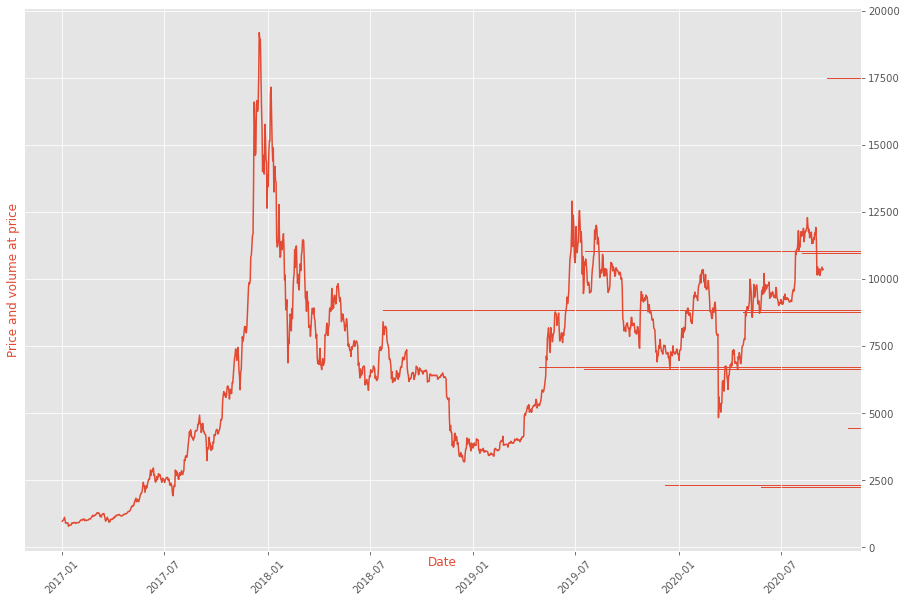

In [58]:
def custom_round(x, base=25):
    return int(base * round(float(x)/base))

df = DailyDf[DailyDf.index.year >= 2017]

df['base'] = df.close.apply(lambda x: custom_round(x))

VPOC = pd.DataFrame(df.groupby('base').volume.sum())

fig, ax = plt.subplots()
ax1 = ax.twiny()

ax.barh(VPOC.index, VPOC.volume)
ax.invert_xaxis()  # labels read top-to-bottom
ax.yaxis.tick_right()
ax.get_xaxis().set_ticks([])
ax.set_xlabel("Date", color="C0")
ax.set_ylabel('Price and volume at price', color="C0") 

ax1.plot(df.index, df.close)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelrotation=45)
fig.set_size_inches(15, 10)

plt.show()

/Users/josevans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


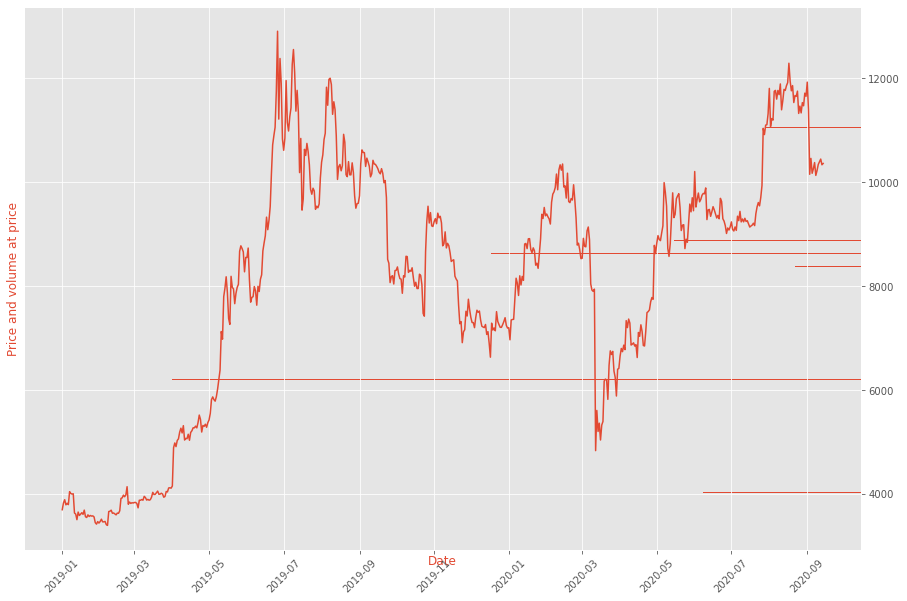

In [61]:

df = DailyDf[DailyDf.index.year >= 2019]

df['base'] = df.close.apply(lambda x: custom_round(x))

VPOC = pd.DataFrame(df.groupby('base').volume.sum())

fig, ax = plt.subplots()
ax1 = ax.twiny()

ax.barh(VPOC.index, VPOC.volume)
ax.invert_xaxis()  # labels read top-to-bottom
ax.yaxis.tick_right()
ax.get_xaxis().set_ticks([])
ax.set_xlabel("Date", color="C0")
ax.set_ylabel('Price and volume at price', color="C0") 

ax1.plot(df.index, df.close)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelrotation=45)
fig.set_size_inches(15, 10)

plt.show()

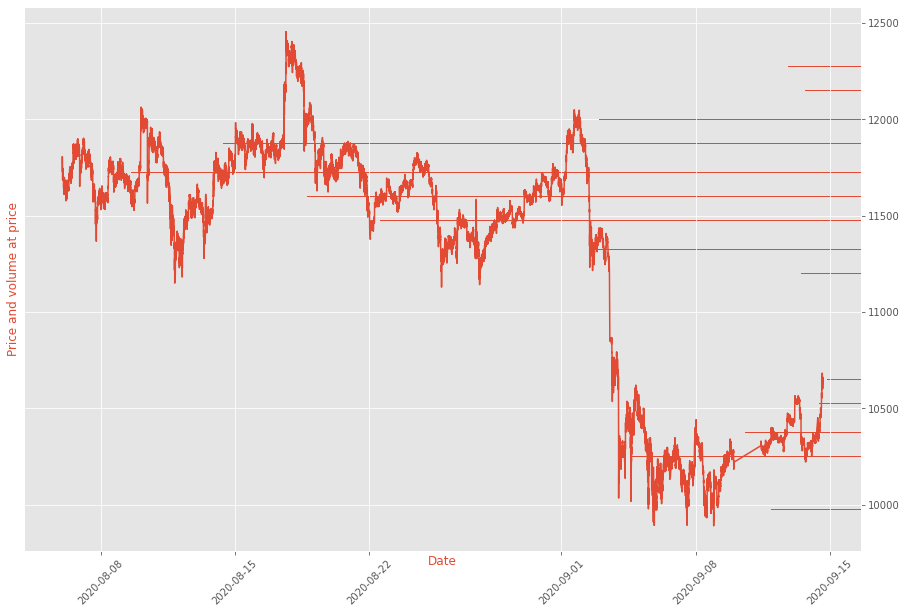

In [68]:

IntraDf['base'] = IntraDf.close.apply(lambda x: custom_round(x))

VPOC = pd.DataFrame(IntraDf.groupby('base').volume.sum())

fig, ax = plt.subplots()
ax1 = ax.twiny()

ax.barh(VPOC.index, VPOC.volume)
ax.invert_xaxis()  # labels read top-to-bottom
ax.yaxis.tick_right()
ax.get_xaxis().set_ticks([])
ax.set_xlabel("Date", color="C0")
ax.set_ylabel('Price and volume at price', color="C0") 

ax1.plot(IntraDf.index, IntraDf.close)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelrotation=45)
fig.set_size_inches(15, 10)

plt.show()

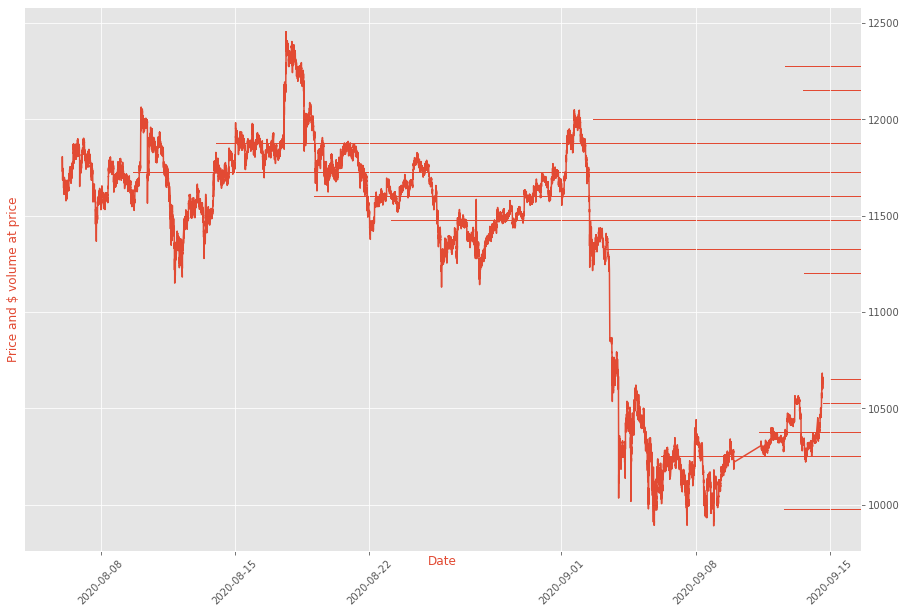

In [69]:

IntraDf['base'] = IntraDf.close.apply(lambda x: custom_round(x))

VPOC = pd.DataFrame(IntraDf.groupby('base').dollar_volume.sum())

fig, ax = plt.subplots()
ax1 = ax.twiny()

ax.barh(VPOC.index, VPOC.dollar_volume)
ax.invert_xaxis()  # labels read top-to-bottom
ax.yaxis.tick_right()
ax.get_xaxis().set_ticks([])
ax.set_xlabel("Date", color="C0")
ax.set_ylabel('Price and $ volume at price', color="C0") 

ax1.plot(IntraDf.index, IntraDf.close)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelrotation=45)
fig.set_size_inches(15, 10)

plt.show()

In [80]:
import plotly
import cufflinks as cf
cf.go_offline()

DailyDf['close'].loc['2018-05-01':].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [79]:

DailyDf['close'].loc['2018-05-01':].ta_plot(study='boll', title='Bollinger Bands')

In [78]:
IntraDf.iloc[-500:]['close'].ta_plot(study='boll', title='Bollinger Bands')

Possible strategy - buy or sell when at lower/upper bollinger band and bolling band turns up/down

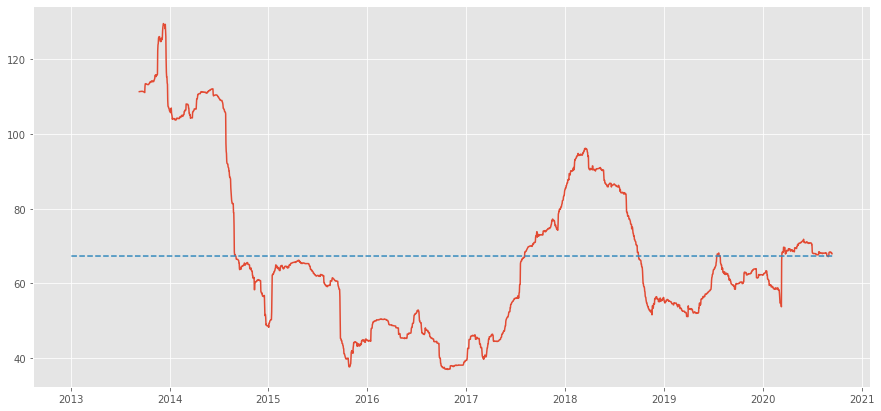

In [89]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 7)

BTC_vol = DailyDf['%chg_1_days_later'].rolling(252).std()*np.sqrt(252)
y_mean = [BTC_vol.mean()]*len(BTC_vol)
data = ax.plot(BTC_vol.index, BTC_vol, label='Annualised historical volatility')
mean = ax.plot(BTC_vol.index, y_mean, label='Mean', linestyle='--')